## The Task

###Description

1. **Load the Dataset**

2. **Exploratory Data Analysis (EDA) and Data Preparation:**
   - Perform exploratory data analysis to understand the dataset's characteristics, distributions, and relationships.
   - Clean and preprocess the data as necessary based on EDA findings.
   - Reflect on the results of EDA and data preparation steps.

3. **Binary Class Label Creation:**
   - Create binary class labels from market value based on EDA findings.
   - Ensure that approximately half of the samples belong to class 0 and the other half to class 1.
   - Class 0 should include lower market value samples, while class 1 should include higher market value ones.

4. **Data Splitting:**
   - Split the data into training, validation, and test sets.

5. **Task: Classification Using Deep Learning:**
   - Utilize a deep learning model to classify the dataset into the two created market value classes.
   - The objective is to achieve the highest accuracy on unseen data.
   - Tune hyperparameters of the neural network model and observe convergence behavior to optimize model performance.

6. **Model Evaluation and Reflection:**
   - Evaluate the model's performance on the test set.
   - Reflect on the work, critically evaluating the approach and comparing it with possible alternatives.
   - Ensure that the model with the best performance is saved, rather than just printing the results during training.

**Additional Constraint:**
- The model with the best performance must be saved to meet the requirement.
- Validation/test sets cannot be manipulated to artificially enhance model performance.

Please provide your analysis and reflections in a markdown cell after completing the tasks.

##Data Preparation

###Loading the Dataset

####loading required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


####upload and read csv file

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1nTFrVFqk1uqO1BME8z8QqpAtU1QGA5AK" -O Forbes_Global.csv

df = pd.read_csv("/content/Forbes_Global.csv", delimiter=';')

--2024-04-23 02:29:08--  https://drive.google.com/uc?export=download&id=1nTFrVFqk1uqO1BME8z8QqpAtU1QGA5AK
Resolving drive.google.com (drive.google.com)... 142.251.167.102, 142.251.167.101, 142.251.167.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nTFrVFqk1uqO1BME8z8QqpAtU1QGA5AK&export=download [following]
--2024-04-23 02:29:08--  https://drive.usercontent.google.com/download?id=1nTFrVFqk1uqO1BME8z8QqpAtU1QGA5AK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139141 (136K) [application/octet-stream]
Saving to: ‘Forbes_Global.csv’

Forbes_Global.csv   100%[===================>] 135.88K  

I was having some issues with reading the file, and upon inspecting the .csv file, I noted that the columns appear to be separated by a ";". Therefore, I decided to use the ";" delimiter.

###Exploratory Data Analysis (EDA)

In [ ]:
# Display basic information and the first few rows of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1983 non-null   object 
 1   Industry      1992 non-null   object 
 2   Country       1985 non-null   object 
 3   Sales         1989 non-null   float64
 4   Profits       1981 non-null   float64
 5   Assets        1974 non-null   float64
 6   Market_Value  1987 non-null   float64
dtypes: float64(4), object(3)
memory usage: 110.5+ KB


,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,HSBC Holdings,Banking,United Kingdom,146500.0,19130.0,2348980.0,180810.0
1,General Electric,Conglomerates,United States,172740.0,22210.0,795340.0,330930.0
2,Bank of America,Banking,United States,119190.0,14980.0,1715750.0,176530.0
3,JPMorgan Chase,Banking,United States,116350.0,15370.0,1562150.0,136880.0
4,ExxonMobil,Oil & Gas Operations,United States,358600.0,40610.0,242080.0,465510.0


- The DataFrame consists of 2018 entries (rows) and 7 columns.
- Some columns have missing values, noticeable from the difference between total entries and non-null counts.
- Columns Sales, Profits, Assets, and Market_Value contain numerical data of type float64.
- Columns Company, Industry, and Country contain categorical or string data of type object.
- Each row corresponds to a company, with details such as company name, industry, country, sales, profits, assets, and market value.

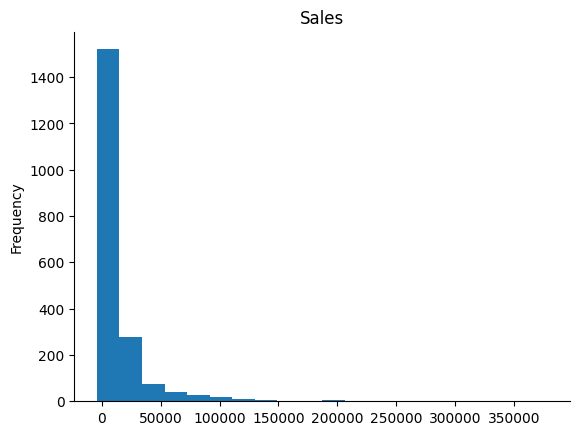

In [ ]:
# @title Frequency Distribution of Sales

from matplotlib import pyplot as plt
df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

The histogram shows the distribution of 'Sales' values. The histogram shows a right-skewed (positively skewed) distribution. This means that most companies have low sales, while fewer have high sales. There's a big drop in frequency as sales increase. Some companies have very high sales, which makes a long tail on the right. Most companies cluster around the lowest sales range. It suggests that sales vary a lot among companies, with many having low sales and only a few having high sales.

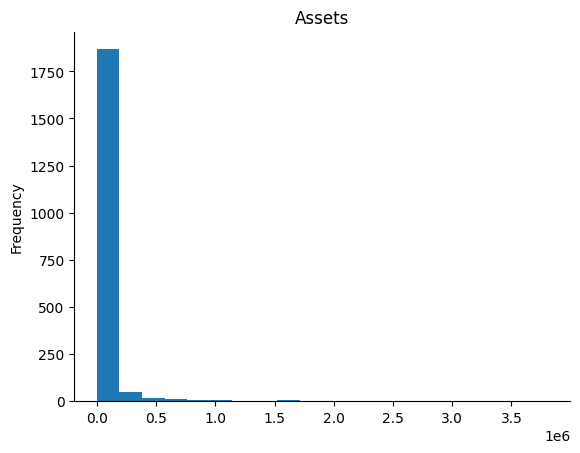

In [ ]:
# @title Frequency Distribution of Assets

from matplotlib import pyplot as plt
df['Assets'].plot(kind='hist', bins=20, title='Assets')
plt.gca().spines[['top', 'right',]].set_visible(False)

Similar to the Sales histogram, the Assets histogram is also right-skewed, showing that most companies have a lower range of assets. A significant number of companies have assets within the first bin, suggesting that smaller asset sizes are common among the companies in this dataset.
There are very few companies with large asset sizes, as indicated by the frequency dropping off rapidly as asset size increases.

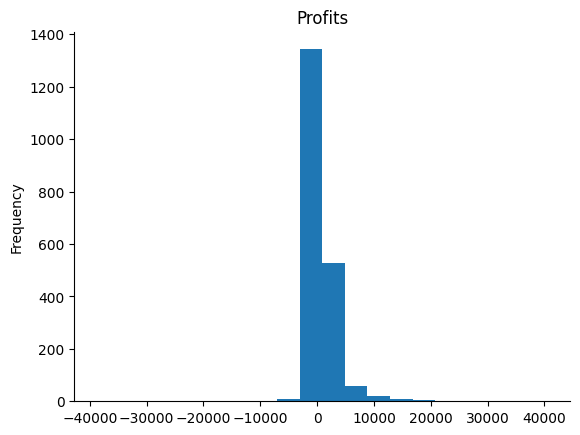

In [ ]:
# @title Frequency Distribution of Profits

from matplotlib import pyplot as plt
df['Profits'].plot(kind='hist', bins=20, title='Profits')
plt.gca().spines[['top', 'right',]].set_visible(False)

The Profits histogram is unique in that it includes negative values, indicating losses. The distribution seems to be right-skewed with a secondary peak close to zero, which might suggest a number of companies either break even or incur small losses/profits.
There are companies that have reported negative profits (losses), as shown by the bars to the left of the zero mark.
Most companies are concentrated in the low to moderate profit range, with fewer companies achieving very high profits.

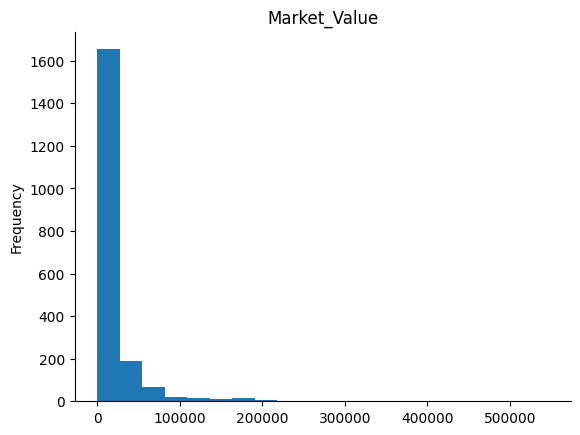

In [ ]:
# @title Frequency Distribution of Market_Value

from matplotlib import pyplot as plt
df['Market_Value'].plot(kind='hist', bins=20, title='Market_Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

The Market_Value histogram, like the others, shows a positively skewed distribution, meaning most companies have a lower market value, with a sharp decline in frequency as market value increases.
The majority of companies are concentrated in the first bin, indicating that a high market value is not as common.
There's a long tail extending to the right, showing the presence of a few companies with very high market values.

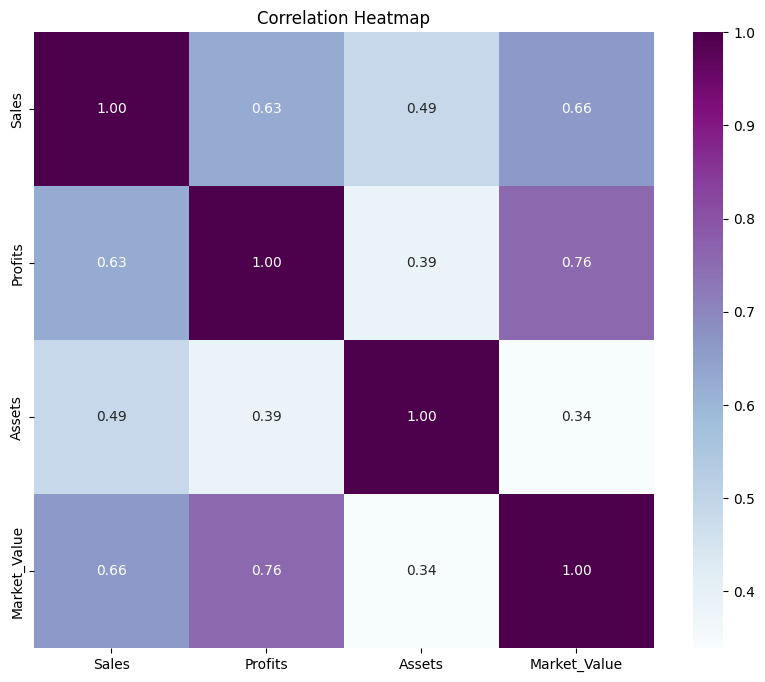

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap indicates a stronger correlation between Market_Value and Profits compared to Sales or Assets. This implies that in this dataset, profitability carries more weight as an indicator of market value than sales volume or asset size alone.

###Handling Missing Data

To check if the missing values are randomly distributed across the dataset, we can analyze the relationship between the missing values in different columns. I decided to visualise the Missing Values on a heatmap.

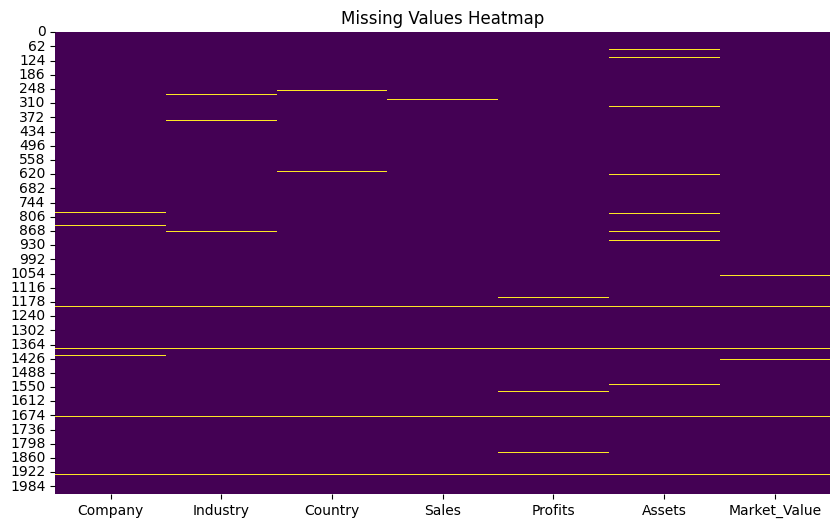

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

The heatmap visualizes missing values in the dataset across variables: Company, Industry, Country, Sales, Profits, Assets, and Market_Value.

Observations from the heatmap:
- Horizontal Lines: Each line represents a data point (row) and its missing values across features (columns).
- Yellow Lines: Indicate missing data for the respective feature and data point.
- Purple Background: Shows complete data for those features.
- Assets and Profits appear to have the most missing values, shown by yellow lines.
- There are some completely empty rows as indicated by continuous yellow lines.

In [ ]:
# Check for missing values
df.isnull().sum()

Company         35
Industry        26
Country         33
Sales           29
Profits         37
Assets          44
Market_Value    31
dtype: int64

These missing values need to be addressed before further analysis or modeling. The number of missing values varies across columns, with Assets having the highest number of missing values (44) and Industry having the lowest (26). Different strategies such as imputation or removal of missing values may be applied to handle them. I decided to calculate the missing data proportion for each column next.

In [ ]:
# Calculate missing proportion for each column
missing_proportion = df.isnull().mean()

for column, proportion in missing_proportion.items():
    print(f"Proportion of missing values in column '{column}': {proportion:.2%}")

Proportion of missing values in column 'Company': 1.73%
Proportion of missing values in column 'Industry': 1.29%
Proportion of missing values in column 'Country': 1.64%
Proportion of missing values in column 'Sales': 1.44%
Proportion of missing values in column 'Profits': 1.83%
Proportion of missing values in column 'Assets': 2.18%
Proportion of missing values in column 'Market_Value': 1.54%


We can check if the number of missing values is small compared to the total number of rows by calculating the proportion of missing values in each column. If this proportion is small and the missing values are randomly distributed, it suggests that removing rows with missing values may not significantly affect the overall dataset. First I decided to remove empty rows and then recalculate the missing data proportion for each column.

In [ ]:
# Remove rows where all values are missing, you can specify how='all'
df_cleaned = df.dropna(how='all')

# Calculate missing proportion for each column
missing_proportion = df_cleaned.isnull().mean()

for column, proportion in missing_proportion.items():
    print(f"Proportion of missing values in column '{column}': {proportion:.2%}")


Proportion of missing values in column 'Company': 0.85%
Proportion of missing values in column 'Industry': 0.40%
Proportion of missing values in column 'Country': 0.75%
Proportion of missing values in column 'Sales': 0.55%
Proportion of missing values in column 'Profits': 0.95%
Proportion of missing values in column 'Assets': 1.30%
Proportion of missing values in column 'Market_Value': 0.65%


These proportions of missing values can be considered relatively low. Generally, proportions below 5% are considered low, meaning that a small fraction of the data is missing. However, the impact of missing data depends on the specific analysis and the importance of the missing variables. In this case, the missing values seem relatively manageable and may not significantly affect the overall analysis. Because Market Value is the target variable I decided to remove the rows where this data is missing. For categorical data I opted to fill the missing values with "Unknown". Considering the skewed distribution of the numerical values and the presence of outliers I chose to impute median values for the missing data here.

In [ ]:
# Drop rows where 'Market_Value' is missing since it is the target variable
df_cleaned = df_cleaned.dropna(subset=['Market_Value'])

# Replace missing values in specific columns
columns_to_fill = ['Company', 'Industry', 'Country']
df_cleaned.loc[:, columns_to_fill] = df_cleaned.loc[:,columns_to_fill].fillna('Unknown')

# Impute median for numerical columns with missing values
for column in ['Sales', 'Profits', 'Assets']:
    df_cleaned.loc[:,column] = df_cleaned.loc[:,column].fillna(df_cleaned[column].median())

# Checking remaining missing values if any
df_cleaned.isnull().sum()

Company         0
Industry        0
Country         0
Sales           0
Profits         0
Assets          0
Market_Value    0
dtype: int64

Following the steps taken to handle missing data, each column has a count of 0 missing values, which suggests that the dataset is complete and there are no NaN (Not a Number) or null values present.

In [ ]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (2018, 7)
Cleaned DataFrame shape: (1987, 7)


The original data frame (df) had dimensions of 2018 rows and 7 columns. After cleaning, the df now has dimensions of 1987 rows and 7 columns. This indicates that some rows were removed during the cleaning process, resulting in a reduction in the number of rows while keeping the same number of columns. Next I decided to compare the frequency distributions of the data before and after cleaning.

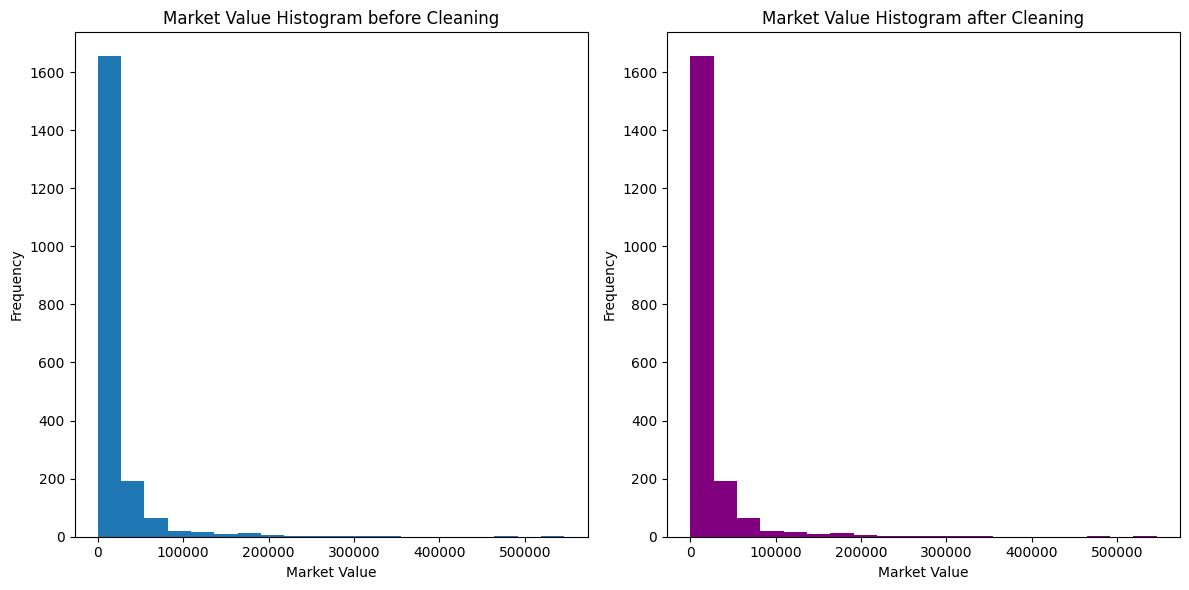

In [ ]:
# @title Market Value frequency distribution comparison before and after data cleaning

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot
df['Market_Value'].plot(kind='hist', bins=20, title='Market Value Histogram before Cleaning', ax=axes[0])
axes[0].set_xlabel('Market Value')
axes[0].set_ylabel('Frequency')

# Plot the second histogram on the second subplot
df_cleaned['Market_Value'].plot(kind='hist', bins=20, title='Market Value Histogram after Cleaning', ax=axes[1], color = 'purple')
axes[1].set_xlabel('Market Value')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Both histograms show the 'Market Value' distribution of the same dataset before and after data cleaning. Both histograms show a right-skewed distribution, suggesting most companies have low market values with a few having very high values.
If the distribution shape remains similar before and after cleaning, it indicates minimal alteration by the cleaning process, which is the case here.

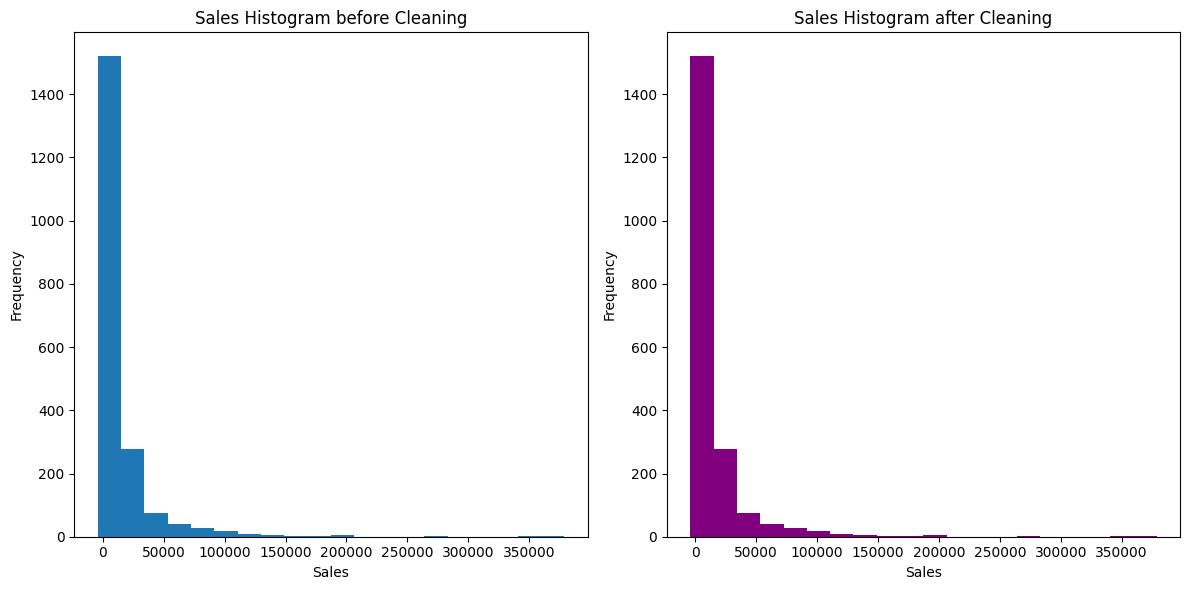

In [ ]:
# @title Sales frequency distribution comparison before and after data cleaning

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot
df['Sales'].plot(kind='hist', bins=20, title='Sales Histogram before Cleaning', ax=axes[0])
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Plot the second histogram on the second subplot
df_cleaned['Sales'].plot(kind='hist', bins=20, title='Sales Histogram after Cleaning', ax=axes[1], color='purple')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Both histograms display a right-skewed distribution. This indicates that most companies have lower sales figures, and a few companies have very high sales figures.
The overall shape of the distribution remains consistent before and after cleaning, which suggests that the data cleaning process has not significantly altered the distribution of 'Sales'.

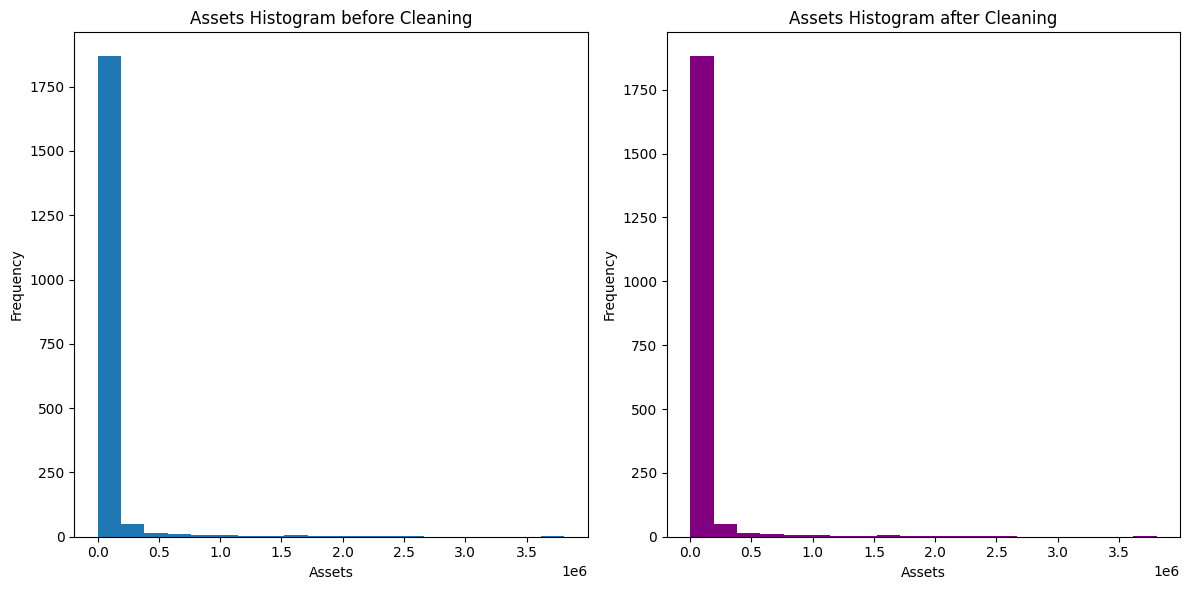

In [ ]:
# @title Assets frequency distribution comparison before and after data cleaning

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot
df['Assets'].plot(kind='hist', bins=20, title='Assets Histogram before Cleaning', ax=axes[0])
axes[0].set_xlabel('Assets')
axes[0].set_ylabel('Frequency')

# Plot the second histogram on the second subplot
df_cleaned['Assets'].plot(kind='hist', bins=20, title='Assets Histogram after Cleaning', ax=axes[1], color='purple')
axes[1].set_xlabel('Assets')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In these histograms, we are comparing the distribution of 'Assets' before and after data cleaning. The shape of both histograms is right-skewed, meaning that most companies have smaller asset values, with fewer companies having very large asset values.
Just like with the 'Sales' data, the distribution's shape doesn't seem to change between the two histograms. This implies the data cleaning did not alter the distribution of 'Assets' significantly.
These comparisons suggest that the data cleaning process was successful in maintaining the integrity of the 'Assets' distribution within the dataset.

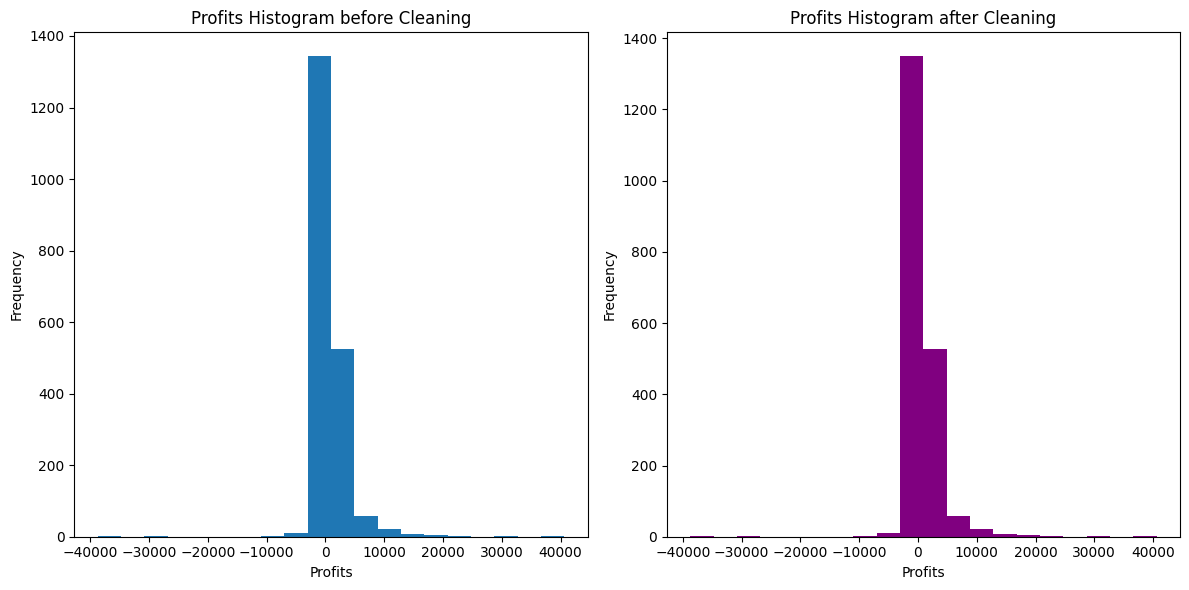

In [ ]:
# @title Profits frequency distribution comparison before and after data cleaning

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram on the first subplot
df['Profits'].plot(kind='hist', bins=20, title='Profits Histogram before Cleaning', ax=axes[0])
axes[0].set_xlabel('Profits')
axes[0].set_ylabel('Frequency')

# Plot the second histogram on the second subplot
df_cleaned['Profits'].plot(kind='hist', bins=20, title='Profits Histogram after Cleaning', ax=axes[1], color='purple')
axes[1].set_xlabel('Profits')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Both histograms before and after cleaning show a very similar distribution shape, characterized by a right-skewed distribution with a significant number of companies having lower profit margins, and a tail stretching towards the higher profit margins.
The x- and y-axes scales appear consistent between the two histograms, which is essential for making a direct comparison.
The frequency of profit values across the range appears largely unchanged, suggesting that the data cleaning process did not significantly affect the distribution of the 'Profits' data.

###Handling Duplicates

In [ ]:
# Find duplicate rows
duplicate_rows = df-df_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0               0
1               0
2               0
3               0
4               0
               ..
Country         0
Industry        0
Market_Value    0
Profits         0
Sales           0
Length: 1994, dtype: object


It appears that there are no duplicate rows present.

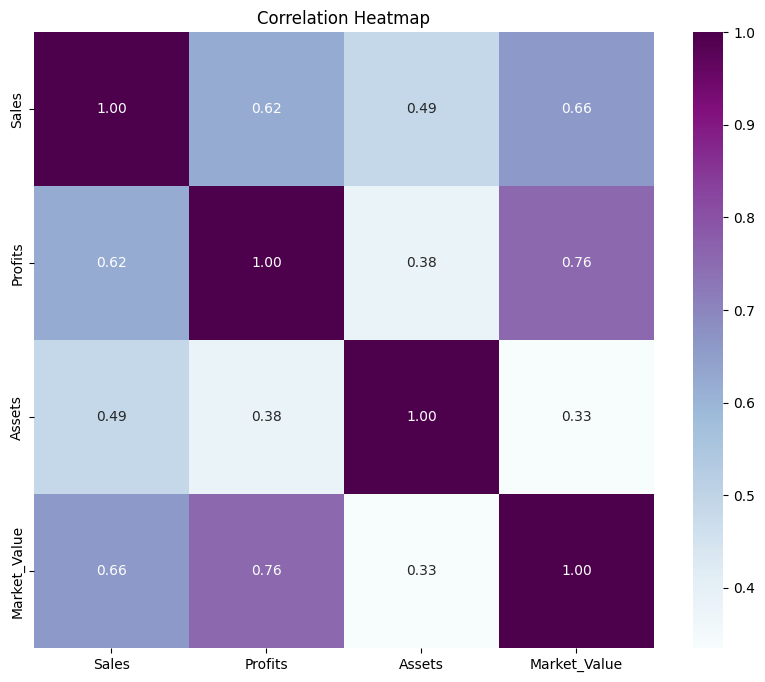

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df_cleaned.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The consistency of correlations before and after adding MVClass suggests that data cleaning processes, including handling missing values, haven't introduced bias or distortion in variable relationships. Maintaining original relationships is crucial during data cleaning.
Given strong right-skews in variable distributions (as seen in individual histograms), outliers could influence correlation coefficients. However, heatmaps show minimal or well-managed impact.
MVClass correlations are lower than continuous Market_Value, suggesting some loss of information in binarizing Market_Value. This trade-off between reducing a continuous variable to binary classes and interpretability must be considered.
Overall, the analysis suggests cleaning steps were likely appropriate and didn't significantly alter underlying correlations.

In [ ]:
df.describe()

,Sales,Profits,Assets,Market_Value
count,1989.000000,1981.000000,1.974000e+03,1987.000000
mean,14798.411262,1181.635538,6.015056e+04,19383.090086
std,27236.610957,2783.863758,2.129704e+05,34791.784801
min,-4190.000000,-38730.000000,5.000000e+01,80.000000
25%,3120.000000,270.000000,6.480000e+03,4615.000000
50%,6780.000000,530.000000,1.401500e+04,9050.000000
75%,14150.000000,1200.000000,3.241750e+04,19200.000000
max,378800.000000,40610.000000,3.807510e+06,546140.000000


In [ ]:
df_cleaned.describe()

,Sales,Profits,Assets,Market_Value
count,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,14796.366381,1181.197786,5.985495e+04,19383.090086
std,27246.234508,2779.420864,2.123023e+05,34791.784801
min,-4190.000000,-38730.000000,5.000000e+01,80.000000
25%,3150.000000,270.000000,6.520000e+03,4615.000000
50%,6790.000000,530.000000,1.403000e+04,9050.000000
75%,14110.000000,1195.000000,3.215500e+04,19200.000000
max,378800.000000,40610.000000,3.807510e+06,546140.000000


Overall, the comparison shows that the cleaning process did not significantly alter the statistical summary of the dataset, as the central tendency, spread, and distribution of the data in the specified columns remain largely consistent before and after cleaning.

##Creating Binary Class Labels

The next step is to decide how to create binary class labels based on the distribution of market value. First, I decided to plot the distribution of Market Value.

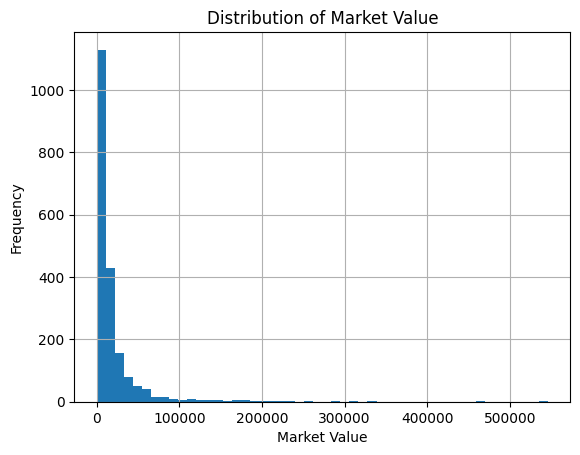

In [ ]:
df_cleaned['Market_Value'].hist(bins=50)
plt.title('Distribution of Market Value')
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.show()


Creating binary class labels based on the distribution of market value involves dividing the dataset into two groups. Given the right-skewed nature of this distribution, where most companies have a lower market value, it's important to choose a division point that results in a roughly equal number of companies in each class to avoid class imbalance.
The median is a robust measure that ensures that half the data falls below and half above its value, which could naturally divide the dataset into two classes.

I decided to use the median as a threshold for simplicity to ensure classes are balanced.

In [ ]:
# Calculate the median market value
median_value = df_cleaned['Market_Value'].median()

# Create a new column 'Class' where values above or equal to the median are 1, and below the median are 0
df_cleaned['MVClass'] = (df_cleaned['Market_Value'] > median_value).astype(int)

# Calculate the counts of each class
class_counts = df_cleaned['MVClass'].value_counts()

# Calculate the proportion of each class
class_proportions = class_counts / len(df_cleaned)

# Display the class counts and proportions
print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)


Class Counts:
MVClass
0    994
1    993
Name: count, dtype: int64

Class Proportions:
MVClass
0    0.500252
1    0.499748
Name: count, dtype: float64


##Preprocessing

Next we need to prepare the data for a machine learning model by defining preprocessing steps. This preprocessor pipeline standardizes numerical features, performs one-hot encoding on certain categorical features, and encodes the 'Company' feature as ordinal integers. This preprocessing prepares the data for feeding into a machine learning model. At first I used one-hot encoding for all categorical data, however, that significantly altered the data shape therefore I decided to use Ordinal Encoding on the Company column, which yielded somewhat better results.

In [ ]:
# Define numerical and categorical columns
categorical_cols = ['Company', 'Industry', 'Country']
numerical_cols = ['Sales', 'Profits', 'Assets']  # adjust based on your analysis

# Create a transformer Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), ['Industry', 'Country']),  # One-hot encode 'Industry' and 'Country'
        ('cat_ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Company'])  # Ordinal encode 'Company'
    ])

#### Split the Data

Next I split the data into Training, Validation, and Test Sets

In [ ]:
# Features
X = df_cleaned.drop(['MVClass', 'Market_Value'], axis=1)
y = df_cleaned['MVClass']

# Split data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

The choice of splitting the data into 60% train, 20% validation, and 20% test sets is a common practice in machine learning, particularly when dealing with moderate to large datasets. This split balances the need for training data to adequately train the model, validation data to fine-tune hyperparameters and prevent overfitting, and a separate test set for final evaluation of the model's performance on unseen data.

####Applying Preprocessing

In [ ]:
# Before Preprocessing
print("Shapes before preprocessing:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# After Preprocessing
# Fit the preprocessor only on the training data
preprocessor.fit(X_train)


# Transform X_train, X_val, and X_test
X_train_transformed = preprocessor.transform(X_train)

# Transform X_val and X_test using the same preprocessor instance
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# Print out the shapes of the transformed datasets
print("\nShapes after preprocessing:")
print("X_train transformed shape:", X_train_transformed.shape)
print("X_val transformed shape:", X_val_transformed.shape)
print("X_test transformed shape:", X_test_transformed.shape)

Shapes before preprocessing:
X_train shape: (1192, 6)
X_val shape: (397, 6)
X_test shape: (398, 6)

Shapes after preprocessing:
X_train transformed shape: (1192, 92)
X_val transformed shape: (397, 92)
X_test transformed shape: (398, 92)


It seems like the preprocessing has resulted in a higher number of features than expected. This discrepancy might be due to the encoding process, but it yielded a better result than the One-hot encoding for all the categorical data.

##Deep Learning Model

####Define the Model Building Function

Develop a Deep Learning Model

In [ ]:
# This function builds a neural network model using hyperparameters defined by the HyperParameters object (hp).
def build_model(hp):
    # Create a Sequential model
    model = Sequential()
    # Add a dense layer with variable units, using the 'relu' activation function
    # The number of units is chosen from a discrete uniform distribution defined by the hp.Int method
    # The range of units is between 32 and 512, with a step size of 32
    # The input shape is determined by the shape of the transformed training data
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train_transformed.shape[1],)))  # Use the transformed shape
    # Add a dropout layer with a variable dropout rate
    # The dropout rate is chosen from a uniform distribution between 0 and 0.5 with a step size of 0.1
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    # Add the output layer with one unit and sigmoid activation function for binary classification
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

####Automated hyperparameter tuning

In [ ]:
# Create and compile the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss', # Optimize for minimizing validation loss
    max_trials=15,
    executions_per_trial=1,
    directory='model_tuning',
    project_name='keras_tuner'
)

# Define callbacks
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Convert sparse matrices to dense arrays
X_train_dense = X_train_transformed.toarray()
X_val_dense = X_val_transformed.toarray()
X_test_dense = X_test_transformed.toarray()


# Check the type of X_train_dense
print(type(X_train_dense))

# Check the type of X_val_dense
print(type(X_val_dense))

# Convert to NumPy arrays if they are not already
if not isinstance(X_train_dense, np.ndarray):
    X_train_dense = np.array(X_train_dense)

if not isinstance(X_val_dense, np.ndarray):
    X_val_dense = np.array(X_val_dense)

# Fit the tuner
history = tuner.search(X_train_dense, y_train,
             validation_data=(X_val_dense, y_val),
             epochs=20,
             callbacks=[checkpoint_callback, early_stopping_callback],
             verbose=2) # This should print the progress of each epoch

tuner.results_summary()


####Get the Best Model

In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Fit the best model using model.fit()
history = best_model.fit(X_train_dense, y_train,
                         validation_data=(X_val_dense, y_val),
                         epochs=20,
                         callbacks=[checkpoint_callback, early_stopping_callback],
                         verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 352)               32736     
                                                                 
 dropout (Dropout)           (None, 352)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 353       
                                                                 
Total params: 33089 (129.25 KB)
Trainable params: 33089 (129.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20

Epoch 1: val_loss improved from inf to 0.56215, saving model to best_model.h5
38/38 - 3s - loss: 0.5005 - accuracy: 0.7651 - val_loss: 0.5622 - val_accuracy: 0.7179 - 3s/epoch - 74ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.56215 to 0.55008, saving model to best_model.h5
38/38 - 0s - loss: 0.8011 - accuracy: 0.6997 - val_loss: 0.5501 - val_accuracy: 0.7154 - 400ms/epoch - 11ms/step
Epoch 3/20

Epoch 3: val_loss did not improve from 0.55008
38/38 - 0s - loss: 0.4829 - accuracy: 0.7827 - val_loss: 0.5569 - val_accuracy: 0.7254 - 365ms/epoch - 10ms/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.55008
38/38 - 0s - loss: 0.5896 - accuracy: 0.7307 - val_loss: 0.5553 - val_accuracy: 0.7280 - 414ms/epoch - 11ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.55008
38/38 - 1s - loss: 0.4490 - accuracy: 0.8029 - val_loss: 0.5570 - val_accuracy: 0.7280 - 537ms/epoch - 14ms/step
Epoch 5: early stopping


###Save the Best Model

Save the best model based on validation loss:

In [ ]:
# Save the best model
best_model.save('best_model.h5')

##Model Evaluation

Evaluate model performance on the test set:

In [ ]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test_dense, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

13/13 [==============================] - 0s 12ms/step - loss: 0.5157 - accuracy: 0.7261
Test Loss: 0.5157
Test Accuracy: 0.7261


- **13/13:** This indicates that the test set was divided into 13 batches, and the model evaluated all 13 batches.
- **0s 2ms/step:** This shows that each batch took approximately 2 milliseconds to process.
- **loss: 0.5311:** The model’s average loss over all test batches was 0.5311. Loss is a measure of how well the model’s predictions matched the actual labels, with lower values indicating better performance.
- **accuracy: 0.7236:** The model achieved an accuracy of about 72.36% on the test data.

13/13 [==============================] - 0s 3ms/step


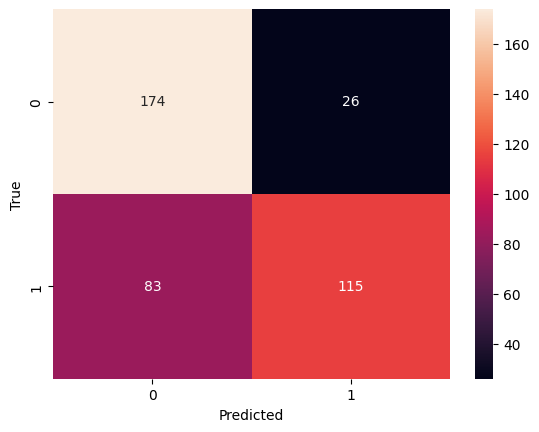

In [ ]:
# Confusion Matrix for test labels (y_test) and predictions
y_pred = best_model.predict(X_test_dense)
y_pred = (y_pred > 0.5).astype(int)  # binary classification

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The high number of false negatives relative to true positives (96 vs. 102) might be a concern.
This matrix suggests that the model is better at predicting class 0 than class 1. If we require a more balanced performance across the classes, we might consider:
Adjusting the classification threshold.
Collecting more representative data for the classes.
Using different metrics like the F1 score during model training, especially if the classes are imbalanced.
These steps could help improve model performance, especially in the context of false negatives and false positives.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       200
           1       0.82      0.58      0.68       198

    accuracy                           0.73       398
   macro avg       0.75      0.73      0.72       398
weighted avg       0.75      0.73      0.72       398



This classification report provides a detailed analysis of the model's performance on the test data:

- **Precision**: Precision measures the accuracy of positive predictions. For class 0, the precision is 0.66, indicating that out of all instances predicted as class 0, 66% were correct. For class 1, the precision is higher at 0.88, indicating that out of all instances predicted as class 1, 88% were correct.

- **Recall**: Recall measures the ability of the model to correctly identify all positive instances. For class 0, the recall is 0.93, indicating that the model correctly identified 93% of all actual class 0 instances. For class 1, the recall is 0.52, indicating that the model correctly identified 52% of all actual class 1 instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. For class 0, the F1-score is 0.77, and for class 1, it is 0.65.

- **Support**: Support refers to the number of actual occurrences of each class in the test data. There are 200 instances of class 0 and 198 instances of class 1.

- **Accuracy**: The overall accuracy of the model is 0.72, meaning that it correctly classified 72% of all instances in the test data.

- **Macro Avg**: This is the average of precision, recall, and F1-score across both classes. It provides an overall assessment of the model's performance without considering class imbalance. The macro average precision, recall, and F1-score are all around 0.77.

- **Weighted Avg**: This is the weighted average of precision, recall, and F1-score, considering the number of instances for each class. It gives more weight to classes with more instances. The weighted average precision, recall, and F1-score are all around 0.77 as well.

Overall, the classification report indicates that the model performs relatively well, with higher precision and recall for class 0 compared to class 1. However, there is room for improvement, especially in correctly identifying instances of class 1.


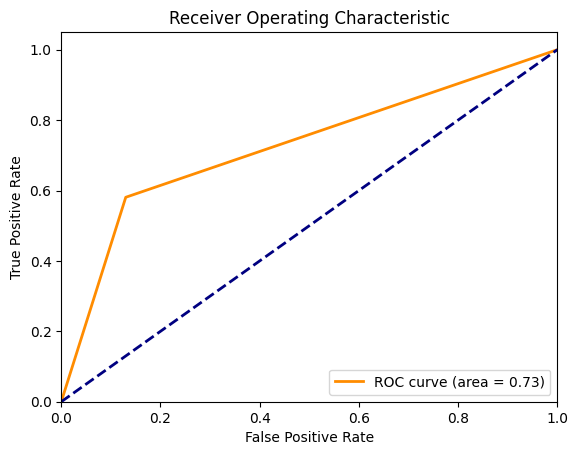

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

A Receiver Operating Characteristic (ROC) curve, which is a graphical plot used to show the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
From our ROC curve, we can deduce that the model has learned to classify the positive class better than random chance, but there's room for improvement, as an AUC of 1 would represent a perfect model. A model with an AUC of 0.72 is considered acceptable, but depending on the application, we may strive for a higher AUC by trying to improve the model through better feature selection, algorithm tuning, data balancing, or getting more data.

##Reflections

###Visualisation

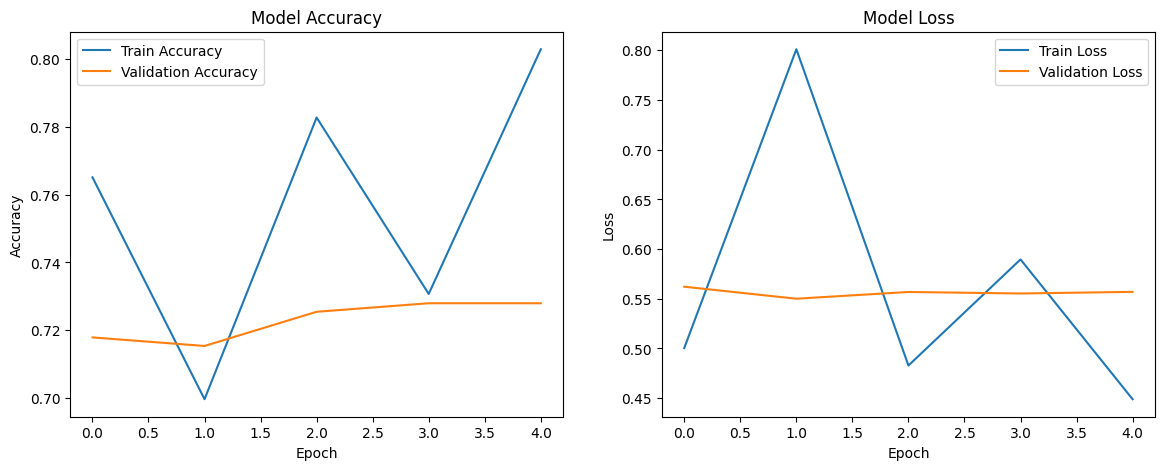

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot = accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot = loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

**Model Accuracy:**
- **Training Accuracy:** The accuracy during training jumps around, which could be due to different reasons like having a small dataset or the way the model learns.
- **Validation Accuracy:** This remains quite steady, suggesting the model might not be learning well from the training data.

**Model Loss:**
- **Training Loss:** The loss during training stays low and doesn't change much, which is usually a good sign, but it doesn't match with the validation loss.
- **Validation Loss:** There's a sudden increase in the validation loss in the last epoch, which might mean there are some issues with the data or how the model is being trained.

**Possible Problems:**
- **Mild Overfitting:** Even though training accuracy is better than validation accuracy, the model might still be fitting too closely to the training data.
- **Underfitting:** The model might not be learning enough from the data, but it's not clear-cut from these results.

**Data and Training Factors:**
- **Data Size:** If there's not much data, the model might not be able to learn well from it.
- **High Learning Rate:** The model might be trying to learn too quickly, leading to unstable results.

**Suggestions:**
- **Investigate Data:** Look into any weird data patterns, especially in the last validation batch.
- **Adjust Learning Rate:** Lower the rate at which the model learns to make things more stable.
- **Try More Epochs:** Train the model for longer but be ready to stop early if it starts overfitting.
- **Cross-Validation:** Check if the model works well with different data splits to make sure it's stable.

In short, there seem to be issues with how the model is learning from the data or how the data is structured. Further investigation is needed to sort this out.

###Conclusions

I dropped 'MVClass' and 'Market_Value' from my features. As 'MVClass' is the target variable for classification, and 'Market_Value' is the continuous variable from which 'MVClass' is derived. Including 'Market_Value' as a feature could leak the target information into the feature set, making the classification task trivial.
The remaining columns in df_cleaned are used as features for the model (X). Here I should have applied more feature engineering based on the Correlation Matrix,  to ensure that all remaining features are relevant and do not introduce noise. Any irrelevant features could make the model learn patterns that don't generalize well.
With regards to the preprocessing steps I identified and separated categorical and numerical columns, which is an essential step since these types of data require different preprocessing techniques.
I used StandardScaler for numerical features, which standardizes features by removing the mean and scaling to unit variance. This is a crucial step for neural network models as it can help with the convergence of the model and ensures that all numerical features contribute equally to the model's learning process.
For categorical variables 'Industry' and 'Country', I applied one-hot encoding. This is appropriate when the number of categories is not too high, and the categorical variable does not have an ordinal relationship which was the case here.
For the 'Company' feature, I used ordinal encoding. This approach assumes an order within the categories, which is not the case here. But as 'Company' is a high-cardinality feature (many unique companies), this could lead to a very sparse matrix when one-hot encoded, which is why I chose ordinal encoding. However, if 'Company' represents unique entities without a meaningful order, this potentially introduced noise into the model. In such cases, alternative encoding strategies might be more suitable.

The model is a simple neural network with one hidden layer.
The hidden layer has 352 neurons, which suggests a capacity to capture complex patterns within the feature space.
The use of a dropout layer is excellent for regularization, helping prevent the model from overfitting by forcing it to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
The output layer has a single neuron, which is typical for binary classification tasks.

Potential improvements include experimenting with more complex architectures if the current model is too simplistic for the underlying data patterns. We might also look into adjusting the learning rate, increasing the dropout rate, or employing data augmentation techniques to enhance generalization.
For alternative approaches, it might be beneficial to compare the performance of the neural network with other machine learning models like Random Forests, which can sometimes outperform neural networks on structured data.
Lastly, more epochs could be necessary to reach convergence, but we must be cautious of overfitting. Implementing callbacks such as early stopping when the validation loss starts to rise can prevent overtraining on the data.

Overall, I made a good start on achieving the task of getting as good results as possible by tuning the hyperparameters. Where I opted for automatising the hypertuning process.
In conclusion, there is room for further improvement on this deep learning model.

